# **Gradient Descent**


## PY599 (Fall 2018): Applied Artificial Intelligence
## NC State University
###Dr. Behnam Kia
### https://appliedai.wordpress.ncsu.edu/


**Disclaimer**: Please note that these codes are simplified version of the algorithms, and they may not give the best, or expected performance that you could possibly get from these algorithms. The aim of this notebook is to help you understand the basics and the essence of these algorithms, and experiment with them. These basic codes are not deployment-ready or free-of-errors for real-world applications. To learn more about these algorithms please refer to text books that specifically study these algorithms, or contact me. - Behnam Kia



## Synthetic Data Preparation

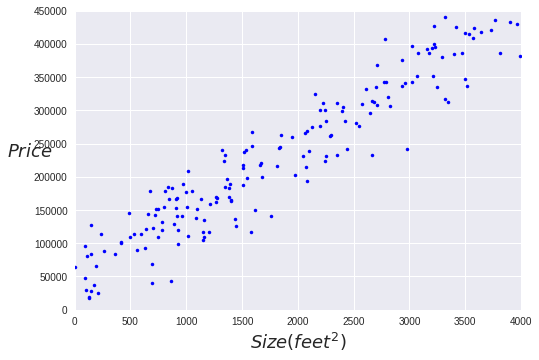

In [1]:
import numpy as np                   #this is our old friend, the handy NumPy
import matplotlib.pyplot as plt      # matplotlib takes cares of ploting   

from sklearn.model_selection import train_test_split   # we use this module to split the dataset to two parts, the training data, 
                                                       #which we use to train the learner, and the test data, which we use to evaluate 
                                                       # the performance of the trained model when it is given unseen data,
                                                       #to assess its generalization power. 

      
      
data_size=300      
# we create a synthetic data set      
x = 4000 * np.random.rand(data_size, 1)
y = 50000 + 100 * x +35000*np.random.randn(data_size, 1)



#we split the dataset to training and testing
test_fraction=0.4

x_train, x_test, y_train, y_test=train_test_split (x, y, test_size=test_fraction, random_state=6)


training_size=data_size*(1-test_fraction)
test_size=data_size*test_fraction

plt.plot(x_train, y_train, "b.")


plt.xlabel("$Size (feet^2)$", fontsize=18)
plt.ylabel("$Price$", rotation=0, fontsize=18)
plt.axis([0, 4000, 0, 450000])
plt.show()


## Linear Regression with Gradient Descent

### Contours



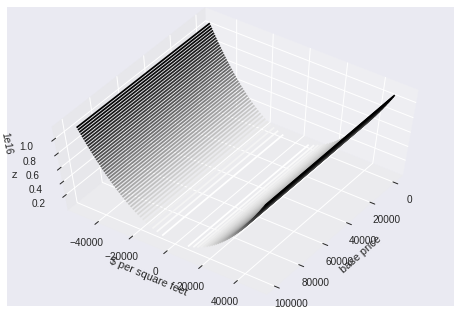

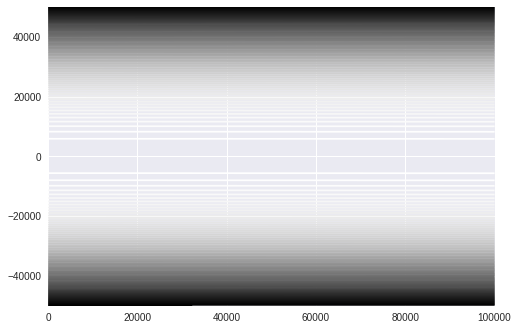

In [2]:
def ErrorForLinearReg(w0, w1, x_data,y_data):
    total_Error = 0
    for i in range(0, len(x_data)):
        total_Error += (y_data[i] - (w1 * x_data[i]+ w0)) ** 2
    return total_Error / float(len(x_data))
  
  
  
from mpl_toolkits import mplot3d
xx=np.linspace(0,100000,200)
yy=np.linspace(-50000,50000,200)
X, Y = np.meshgrid(xx, yy)
Z = ErrorForLinearReg(X, Y,x_train, y_train)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.view_init(60, 35)
ax.set_xlabel('base price')
ax.set_ylabel('$ per square feet')
ax.set_zlabel('z');
plt.figure(2)
plt.contour(X, Y, Z,100)
plt.show()

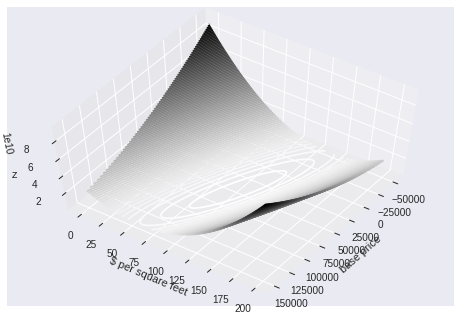

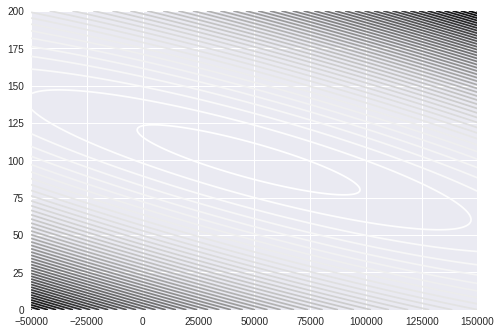

In [3]:
xx=np.linspace(-50000,150000,200)
yy=np.linspace(0,200,200)
X, Y = np.meshgrid(xx, yy)
Z = ErrorForLinearReg(X, Y,x_train, y_train)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='binary')
ax.view_init(60, 35)
ax.set_xlabel('base price')
ax.set_ylabel('$ per square feet')
ax.set_zlabel('z');
plt.figure(2)
plt.contour(X, Y, Z,50)
plt.show()

## Linear Regression

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


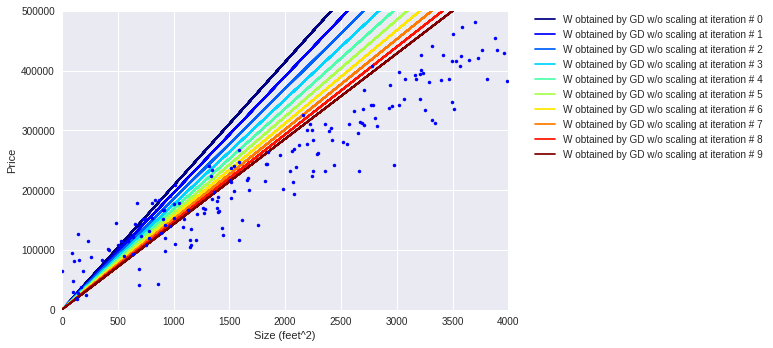

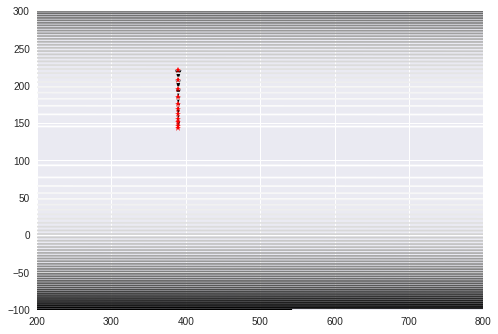

In [4]:

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()




x_trainp=np.c_[np.ones((int(training_size))),x_train]  #padding x_train with ones



xx=np.linspace(200,800,200)
yy=np.linspace(-100,300,200)
X, Y = np.meshgrid(xx, yy)
Z = ErrorForLinearReg(X, Y,x_train, y_train)
ax2.contour(X, Y, Z,50)





alpha = 0.00000003
n_iterations = 10
m = training_size  # in the slides I used n for the number of training data, here I am using m. 

colors = plt.cm.jet(np.linspace(0,1,n_iterations))

np.random.seed(seed=80)
W = 100*np.random.randn(2,1)+200

Wtrajectory=np.array(W)


for iteration in range(n_iterations):
    gradients = 1/m * x_trainp.T.dot(x_trainp.dot(W) - y_train)
    #print("gradi",gradients)
    W = W - alpha * gradients
    y_hat=x_trainp.dot(W)  
    ax1.plot(x_train,y_hat,color=colors[iteration],label="W obtained by GD w/o scaling at iteration # %d"%iteration)
    Wtrajectory=np.hstack((Wtrajectory,W))


    
x_hat=np.linspace(-2,2,100)
x_p=np.c_[np.ones((100)),x_hat] # we are adding x_0=1 as the first feature




ax1.plot(x_train,y_train,"b.")


ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax1.axis([0, 4000, 0, 500000])
ax1.set_xlabel('Size (feet^2)')
ax1.set_ylabel('Price')
fig1.show()

ax2.plot(Wtrajectory[0,:],Wtrajectory[1,:],'r*')
ax2.quiver(Wtrajectory[0,:-1], Wtrajectory[1,:-1], Wtrajectory[0,1:]-Wtrajectory[0,:-1], Wtrajectory[1,1:]-Wtrajectory[1,:-1], scale_units='xy', angles='xy', scale=1)
fig2.show()